#Análise de Satisfação de Bancos

Imagine que você e eu fomos contratados por uma instituição financeira de grande porte para analisar a satisfação dos clientes com os serviços prestados pela empresa. Como analistas de dados, nossa missão é coletar, processar e analisar um grande volume de dados para obter insights valiosos sobre o que os clientes pensam sobre a empresa, suas necessidades e expectativas.

Para começar, vamos coletar dados de diversas fontes, como pesquisas de satisfação, registros de atendimento ao cliente, feedbacks nas redes sociais e reclamações registradas em plataformas de avaliação de empresas. Com esses dados em mãos, podemos criar um banco de dados robusto e padronizado para análise.

Faça as seguintes análises

1. Analisar NPS de classificação de cada instituição
2. Calcular a % de elogios do app para cada instituição
3. Calcular a % de reclamações do app para cada instituição
4. Calcular a % de elogios a instituição para cada instituição
5. Calcular a % de reclamação a instituição para cada instituição
6. Plote um gráfico de linhas para entender a tendência das classificações por instituição

##Configuração dos dados

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#df = pd.read_excel("/content/drive/MyDrive/Datasets/Satisfao com App.xlsx")
df = pd.read_excel('Dados_Satisfacao.xlsx')


In [7]:
df["Elogio quanto ao app"] = df["Elogio quanto ao app"].str.replace("NAO","NÃO")
df["Elogio quanto ao app"] = df["Elogio quanto ao app"].str.replace("NÃO","0")
df["Elogio quanto ao app"] = df["Elogio quanto ao app"].str.replace("SIM","1")
df["Reclamação quanto ao app"] = df["Reclamação quanto ao app"].str.replace("SIM","1")
df["Reclamação quanto ao app"] = df["Reclamação quanto ao app"].str.replace("NÃO","0")
df["Elogio a Instituição"] = df["Elogio a Instituição"].str.replace("SIM","1")
df["Elogio a Instituição"] = df["Elogio a Instituição"].str.replace("NÃO","0")
df["Reclamação a Instituição"] = df["Reclamação a Instituição"].str.replace("SIM","1")
df["Reclamação a Instituição"] = df["Reclamação a Instituição"].str.replace("NÃO","0")
df["Não Classificável"] = df["Não Classificável"].str.replace("SIM","1")
df["Não Classificável"] = df["Não Classificável"].str.replace("NÃO","0")

# Define the replacement dictionary
replace_dict = {'NAO': '0', 'NÃO': '0', 'SIM': '1'}
colunas_replace = [
    "Elogio quanto ao app",
    "Reclamação quanto ao app",
    "Elogio a Instituição",
    "Reclamação a Instituição",
    "Não Classificável"
]
# Replace the strings in the 'col1' column
df[colunas_replace] = df[colunas_replace].replace(replace_dict)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Instituição               8702 non-null   object
 1   Comentario                8698 non-null   object
 2   Data                      8702 non-null   int64 
 3   Classificação             8702 non-null   int64 
 4   Elogio quanto ao app      8702 non-null   object
 5   Reclamação quanto ao app  8702 non-null   object
 6   Elogio a Instituição      8702 non-null   object
 7   Reclamação a Instituição  8702 non-null   object
 8   Não Classificável         8702 non-null   object
dtypes: int64(2), object(7)
memory usage: 612.0+ KB


In [9]:
df["Elogio quanto ao app"] = df["Elogio quanto ao app"].astype(int)
df["Elogio quanto ao app"] = df["Elogio quanto ao app"].astype(int)
df["Elogio quanto ao app"] = df["Elogio quanto ao app"].astype(int)
df["Reclamação quanto ao app"] = df["Reclamação quanto ao app"].astype(int)
df["Reclamação quanto ao app"] = df["Reclamação quanto ao app"].astype(int)
df["Elogio a Instituição"] = df["Elogio a Instituição"].astype(int)
df["Elogio a Instituição"] = df["Elogio a Instituição"].astype(int)
df["Reclamação a Instituição"] = df["Reclamação a Instituição"].astype(int)
df["Reclamação a Instituição"] = df["Reclamação a Instituição"].astype(int)
df["Não Classificável"] = df["Não Classificável"].astype(int)
df["Não Classificável"] = df["Não Classificável"].astype(int)

# Replace the strings in the 'col1' column
df[colunas_replace] = df[colunas_replace].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Instituição               8702 non-null   object
 1   Comentario                8698 non-null   object
 2   Data                      8702 non-null   int64 
 3   Classificação             8702 non-null   int64 
 4   Elogio quanto ao app      8702 non-null   int64 
 5   Reclamação quanto ao app  8702 non-null   int64 
 6   Elogio a Instituição      8702 non-null   int64 
 7   Reclamação a Instituição  8702 non-null   int64 
 8   Não Classificável         8702 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 612.0+ KB


In [11]:
df.describe()

,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
count,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000
mean,43866.945760,4.158584,0.722937,0.219835,0.046081,0.051023,0.035049
std,117.149061,1.439392,0.447573,0.414158,0.209673,0.220057,0.183915
min,43667.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43765.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43870.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,43968.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,44067.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Instituição               8702 non-null   object
 1   Comentario                8698 non-null   object
 2   Data                      8702 non-null   int64 
 3   Classificação             8702 non-null   int64 
 4   Elogio quanto ao app      8702 non-null   int64 
 5   Reclamação quanto ao app  8702 non-null   int64 
 6   Elogio a Instituição      8702 non-null   int64 
 7   Reclamação a Instituição  8702 non-null   int64 
 8   Não Classificável         8702 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 612.0+ KB


<AxesSubplot:>

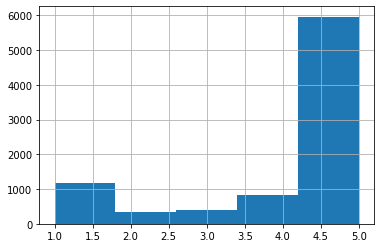

In [13]:
df['Classificação'].hist(bins = 5)

<AxesSubplot:xlabel='Classificação'>

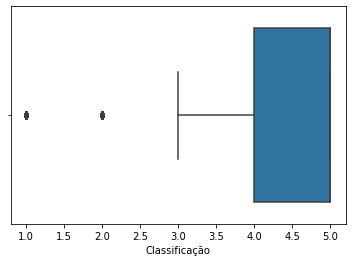

In [14]:
# Plot the boxplot
sns.boxplot(x = df['Classificação'])

In [15]:
df['Classificação'].value_counts(normalize = True) * 100

5    68.501494
1    13.502643
4     9.618479
3     4.619628
2     3.757757
Name: Classificação, dtype: float64

In [16]:
df["Classificação"] = df["Classificação"].replace(1,-1)
df["Classificação"] = df["Classificação"].replace(2,-1)
df["Classificação"] = df["Classificação"].replace(3,0)
df["Classificação"] = df["Classificação"].replace(4,1)
df["Classificação"] = df["Classificação"].replace(5,1)

##NPS Instituição




In [17]:
df.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,43667,1,1,0,0,0,0
1,Banco do Brasil,excelente,43667,1,1,0,0,0,0
2,Banco do Brasil,Bom,43667,1,1,0,0,0,0
3,Banco do Brasil,aplicativo muito top,43667,1,1,0,0,0,0
4,Banco do Brasil,Fácil e prático,43667,1,1,0,0,0,0


In [18]:
df.describe()

,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
count,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000
mean,43866.945760,0.608596,0.722937,0.219835,0.046081,0.051023,0.035049
std,117.149061,0.763860,0.447573,0.414158,0.209673,0.220057,0.183915
min,43667.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43765.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43870.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,43968.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,44067.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df_bancos_agrupados = df.groupby(["Instituição"])["Classificação"].agg("mean").sort_values().reset_index()
#df_bancos_agrupados = df.groupby(["Instituição"])["Classificação"].median().sort_values().reset_index()

df_bancos_agrupados['Classificação'] = df_bancos_agrupados['Classificação'] * 100
df_bancos_agrupados

,Instituição,Classificação
0,Caixa Econômica Federal,42.413793
1,Banco Itau,56.954023
2,Nubank,58.529581
3,Banco Bradesco,68.236646
4,Banco do Brasil,78.160920


In [20]:
df[df['Instituição'] == 'Nubank']['Classificação'].value_counts(normalize = True) * 100

 1    77.139575
-1    18.609994
 0     4.250431
Name: Classificação, dtype: float64

In [21]:
77.139575 - 18.609994

58.52958099999999

In [22]:
sns.set_palette("Set1")
sns.set_style("darkgrid")

<AxesSubplot:xlabel='Instituição', ylabel='Classificação'>

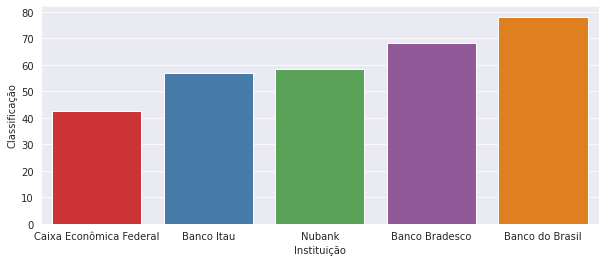

In [23]:
#O banco mais bem avaliado no quesito "Classificação" é o Banco do Brasil, seguido pelo Bradesco, Nubank, Itau e Caixa Econômica Federal

plt.subplots(figsize = (10,4))
sns.barplot(data = df_bancos_agrupados, x = 'Instituição', y= 'Classificação')

##% de elogios do app para cada instituição

In [24]:
df.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,43667,1,1,0,0,0,0
1,Banco do Brasil,excelente,43667,1,1,0,0,0,0
2,Banco do Brasil,Bom,43667,1,1,0,0,0,0
3,Banco do Brasil,aplicativo muito top,43667,1,1,0,0,0,0
4,Banco do Brasil,Fácil e prático,43667,1,1,0,0,0,0


<AxesSubplot:xlabel='Instituição', ylabel='Elogio quanto ao app'>

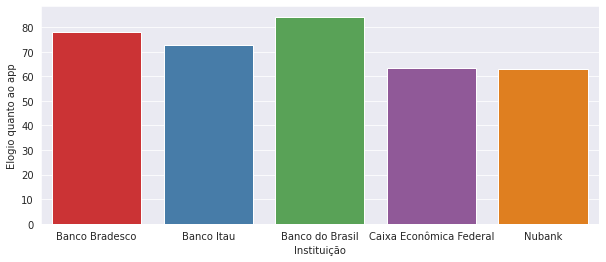

In [25]:
#Calculando NPS da métrica de Elogio do APP
df_Elogio_App = df.groupby('Instituição')['Elogio quanto ao app'].mean().reset_index()
df_Elogio_App['Elogio quanto ao app'] = df_Elogio_App['Elogio quanto ao app']*100
plt.subplots(figsize = (10,4))
sns.barplot(x = 'Instituição', y = 'Elogio quanto ao app', data = df_Elogio_App)

In [26]:
df_Elogio_App

,Instituição,Elogio quanto ao app
0,Banco Bradesco,77.886272
1,Banco Itau,72.816092
2,Banco do Brasil,84.252874
3,Caixa Econômica Federal,63.505747
4,Nubank,63.009765


##% de reclamações do app para cada instituição

               Instituição  Reclamação quanto ao app
0           Banco Bradesco                 19.356692
1               Banco Itau                 25.402299
2          Banco do Brasil                 13.620690
3  Caixa Econômica Federal                 33.793103
4                   Nubank                 17.748420


<AxesSubplot:xlabel='Instituição', ylabel='Reclamação quanto ao app'>

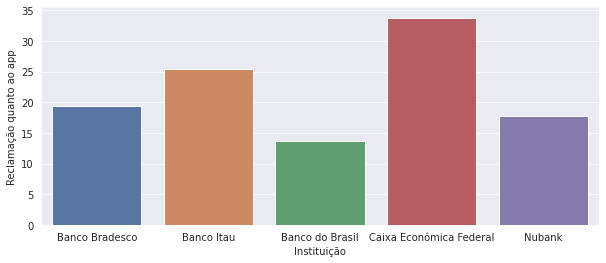

In [33]:
#Calculando % de reclamação do app de cada instituição

df_reclamacao_App = df.groupby('Instituição')['Reclamação quanto ao app'].mean().reset_index()
df_reclamacao_App['Reclamação quanto ao app'] = df_reclamacao_App['Reclamação quanto ao app']*100
plt.subplots(figsize = (10,4))
print(df_reclamacao_App)
sns.barplot(x='Instituição', y = 'Reclamação quanto ao app', data=df_reclamacao_App)

##% de elogios a instituição para cada instituição

               Instituição  Elogio a Instituição
0           Banco Bradesco              2.067777
1               Banco Itau              2.643678
2          Banco do Brasil              2.068966
3  Caixa Econômica Federal              0.747126
4                   Nubank             15.508329


<AxesSubplot:xlabel='Instituição', ylabel='Elogio a Instituição'>

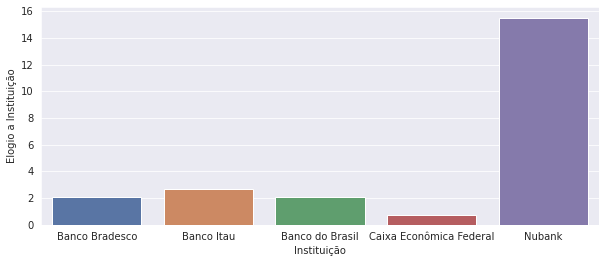

In [34]:
#Calculando % de elogio de cada instituição

df_elogio_instituicao = df.groupby('Instituição')['Elogio a Instituição'].mean().reset_index()
df_elogio_instituicao['Elogio a Instituição'] = df_elogio_instituicao['Elogio a Instituição']*100
print(df_elogio_instituicao)
plt.subplots(figsize = (10,4))
sns.barplot(x='Instituição', y = 'Elogio a Instituição', data=df_elogio_instituicao)

##% de reclamações a instituição para cada instituição

               Instituição  Reclamação a Instituição
0           Banco Bradesco                  2.354968
1               Banco Itau                  3.678161
2          Banco do Brasil                  2.471264
3  Caixa Econômica Federal                  2.126437
4                   Nubank                 14.876508


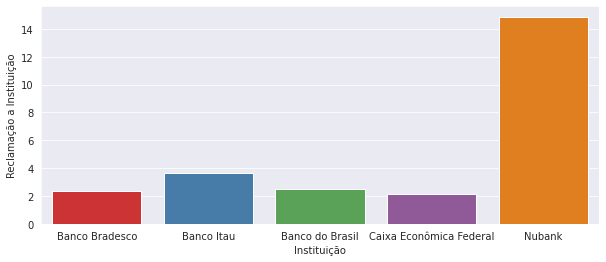

In [29]:
#Calculando % de reclamação cada instituição

df_reclamacao_instituicao = df.groupby('Instituição')['Reclamação a Instituição'].mean().reset_index()
df_reclamacao_instituicao['Reclamação a Instituição'] = df_reclamacao_instituicao['Reclamação a Instituição']*100
plt.subplots(figsize = (10,4))
sns.barplot(x='Instituição', y = 'Reclamação a Instituição', data=df_reclamacao_instituicao)
print(df_reclamacao_instituicao)

In [30]:
df.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,43667,1,1,0,0,0,0
1,Banco do Brasil,excelente,43667,1,1,0,0,0,0
2,Banco do Brasil,Bom,43667,1,1,0,0,0,0
3,Banco do Brasil,aplicativo muito top,43667,1,1,0,0,0,0
4,Banco do Brasil,Fácil e prático,43667,1,1,0,0,0,0


<AxesSubplot:xlabel='Data', ylabel='Classificação'>

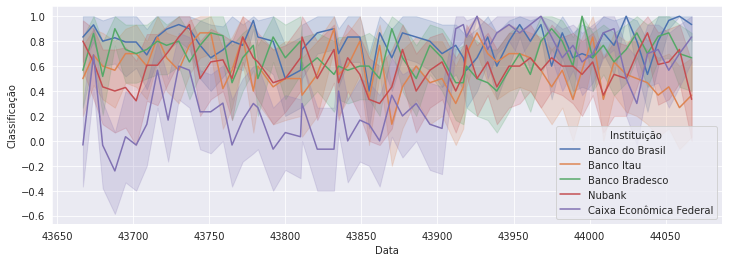

In [31]:
plt.subplots(figsize = (12,4))
sns.set_palette("deep")

sns.lineplot(data = df, x = 'Data',  y = 'Classificação', hue = 'Instituição')